In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os
import zipfile


# Step 2: File path define
zip_path = "/content/drive/MyDrive/Stroke.zip"
extract_folder = "/content/drive/MyDrive/Stroke"

# Step 3: যদি Folder না থাকে তাহলে create করো
os.makedirs(extract_folder, exist_ok=True)

# Step 4: Unzip into that folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"✅ Unzipped to: {extract_folder}")


✅ Unzipped to: /content/drive/MyDrive/Stroke


In [ ]:
import os
import glob

base_path = "/content/drive/MyDrive/Stroke"

sets = ['train', 'valid', 'test']
total_count = 0

for s in sets:
    image_folder = os.path.join(base_path, s, "images")
    image_files = glob.glob(os.path.join(image_folder, "*.jpg"))
    count = len(image_files)
    total_count += count
    print(f"{s.capitalize()} set has {count} images.")

print(f"\n✅ Total image count across all sets: {total_count}")


Train set has 1289 images.
Valid set has 368 images.
Test set has 185 images.

✅ Total image count across all sets: 1842


In [ ]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.3 MB/s eta 0:00:00
   ━

In [ ]:
from ultralytics import YOLO

# Load COCO-pretrained YOLOv11n model
model = YOLO("yolo11n.pt")

In [ ]:
# Train model

results = model.train(
        data="/content/drive/MyDrive/Stroke/data.yaml",  # YAML file with dataset info
        epochs=60,
        imgsz=640,         # Lower image size for faster training
        batch=64,
        cache=True,        # Caches dataset for speed
        amp=True,          # Mixed precision training (faster and memory-efficient)
        patience=20,       # Early stopping if no improvement for 10 epochs
        project="StrokeProject",
        name="exp1",
        exist_ok=True
    )

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Stroke/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pre

train: Scanning /content/drive/MyDrive/Stroke/train/labels.cache... 1289 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1289/1289 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.5GB RAM): 100%|██████████| 1289/1289 [00:07<00:00, 176.85it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.9±4.6 ms, read: 7.1±6.4 MB/s, size: 27.9 KB)


val: Scanning /content/drive/MyDrive/Stroke/valid/labels.cache... 368 images, 0 backgrounds, 0 corrupt: 100%|██████████| 368/368 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.4GB RAM): 100%|██████████| 368/368 [00:04<00:00, 82.58it/s]


Plotting labels to StrokeProject/exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to StrokeProject/exp1
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      8.88G      1.236      2.927      1.846         27        640: 100%|██████████| 21/21 [00:22<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.92s/it]

                   all        368        369    0.00328      0.989      0.399      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      8.21G     0.6706      1.907       1.33         28        640: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.93s/it]

                   all        368        369    0.00334      0.988      0.486      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      8.22G     0.7022      1.455      1.337         29        640: 100%|██████████| 21/21 [00:20<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]

                   all        368        369      0.101      0.947      0.274      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      8.22G     0.7269      1.313       1.35         28        640: 100%|██████████| 21/21 [00:20<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]

                   all        368        369   0.000395      0.127   0.000358   9.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      8.22G     0.7109      1.233      1.348         29        640: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]

                   all        368        369    0.00265      0.145    0.00806    0.00196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      8.21G      0.732       1.16      1.359         28        640: 100%|██████████| 21/21 [00:18<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]

                   all        368        369      0.183      0.799      0.214     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      8.21G     0.6773      1.047      1.318         19        640: 100%|██████████| 21/21 [00:18<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

                   all        368        369      0.264      0.571      0.301     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      8.21G     0.6692      1.011      1.311         26        640: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

                   all        368        369      0.367      0.658      0.476      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      8.21G     0.6589     0.9767      1.304         30        640: 100%|██████████| 21/21 [00:19<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all        368        369      0.769      0.424      0.404      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      8.21G     0.6455     0.9368      1.296         23        640: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.92s/it]

                   all        368        369        0.3      0.737      0.356      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      8.21G     0.6511     0.9218      1.301         28        640: 100%|██████████| 21/21 [00:20<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]

                   all        368        369      0.349      0.773      0.527      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      8.21G     0.6142     0.8851      1.274         29        640: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

                   all        368        369      0.567      0.882      0.732      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      8.21G     0.6035     0.8738      1.261         28        640: 100%|██████████| 21/21 [00:20<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]

                   all        368        369      0.439      0.849      0.695      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      8.21G     0.5956     0.8781       1.25         28        640: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.80s/it]

                   all        368        369      0.544      0.915       0.75      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      8.21G     0.5825     0.8445       1.24         25        640: 100%|██████████| 21/21 [00:20<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all        368        369      0.591      0.876      0.736      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      8.21G     0.5675     0.8231       1.23         26        640: 100%|██████████| 21/21 [00:18<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]

                   all        368        369      0.555      0.916      0.711      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      8.21G     0.5752     0.8398      1.236         30        640: 100%|██████████| 21/21 [00:17<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        368        369      0.491      0.852      0.625      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      8.21G     0.5677     0.8104       1.24         25        640: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all        368        369       0.55      0.754      0.641      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      8.21G     0.5714     0.8192      1.236         24        640: 100%|██████████| 21/21 [00:17<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]

                   all        368        369      0.536       0.87      0.684      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      8.21G     0.5547     0.8009      1.216         30        640: 100%|██████████| 21/21 [00:18<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all        368        369      0.451      0.885      0.625      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      8.21G       0.55     0.7998      1.222         28        640: 100%|██████████| 21/21 [00:19<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all        368        369      0.588      0.896      0.741      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      8.21G      0.528     0.7751      1.211         23        640: 100%|██████████| 21/21 [00:18<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

                   all        368        369      0.613      0.844      0.767      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      8.21G     0.5195     0.7736      1.199         30        640: 100%|██████████| 21/21 [00:17<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

                   all        368        369      0.653      0.787      0.771      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      8.21G      0.551     0.7893      1.224         23        640: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all        368        369      0.596      0.754      0.714      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      8.21G     0.5281     0.7798       1.21         16        640: 100%|██████████| 21/21 [00:17<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

                   all        368        369      0.635      0.835      0.786      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      8.21G     0.5254     0.7702      1.212         26        640: 100%|██████████| 21/21 [00:19<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all        368        369      0.615      0.894      0.758      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      8.21G     0.5178     0.7503      1.201         25        640: 100%|██████████| 21/21 [00:17<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.60s/it]

                   all        368        369      0.518      0.823      0.709      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      8.21G     0.5194      0.756        1.2         26        640: 100%|██████████| 21/21 [00:17<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all        368        369      0.515      0.643      0.567      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      8.21G     0.5135     0.7323      1.185         26        640: 100%|██████████| 21/21 [00:18<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all        368        369      0.555      0.732      0.697      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      8.21G     0.5025      0.744      1.179         25        640: 100%|██████████| 21/21 [00:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]

                   all        368        369      0.603      0.722      0.664      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      8.21G     0.4992     0.7379      1.184         22        640: 100%|██████████| 21/21 [00:17<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all        368        369      0.714      0.789      0.799      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      8.21G     0.4906     0.7207      1.175         28        640: 100%|██████████| 21/21 [00:17<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.58s/it]

                   all        368        369      0.585      0.661      0.583      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      8.21G     0.4905     0.7262      1.177         29        640: 100%|██████████| 21/21 [00:17<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all        368        369      0.675      0.711      0.719      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      8.21G     0.4819     0.6835      1.171         23        640: 100%|██████████| 21/21 [00:18<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]

                   all        368        369      0.481      0.773      0.727      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      8.21G     0.4765     0.7195      1.154         31        640: 100%|██████████| 21/21 [00:17<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.56s/it]

                   all        368        369      0.716      0.854      0.795      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      8.21G     0.4986     0.7156      1.192         29        640: 100%|██████████| 21/21 [00:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all        368        369      0.695      0.889      0.841      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      8.21G     0.4731     0.7088      1.165         24        640: 100%|██████████| 21/21 [00:18<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]

                   all        368        369      0.809      0.807      0.861      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      8.21G     0.4683     0.6915      1.152         29        640: 100%|██████████| 21/21 [00:18<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

                   all        368        369      0.694      0.871      0.826      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      8.21G     0.4738      0.683       1.17         24        640: 100%|██████████| 21/21 [00:18<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        368        369      0.775      0.812      0.832      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      8.21G       0.46     0.6713      1.151         22        640: 100%|██████████| 21/21 [00:17<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]

                   all        368        369      0.586      0.865      0.828       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      8.21G     0.4664     0.6854      1.147         26        640: 100%|██████████| 21/21 [00:17<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all        368        369      0.538      0.763      0.669      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      8.21G     0.4414     0.6394      1.139         23        640: 100%|██████████| 21/21 [00:17<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.51s/it]

                   all        368        369      0.649      0.844      0.775      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      8.21G     0.4628     0.6616       1.15         31        640: 100%|██████████| 21/21 [00:17<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        368        369      0.626      0.803       0.76      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      8.21G     0.4536     0.6696      1.142         28        640: 100%|██████████| 21/21 [00:18<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all        368        369      0.626      0.797       0.76      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      8.21G     0.4543     0.6495      1.148         25        640: 100%|██████████| 21/21 [00:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:02<00:04,  2.49s/it]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x788e57dba7a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x788e57d

                   all        368        369      0.713      0.867      0.868      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      8.21G     0.4579      0.674       1.15         30        640: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]

                   all        368        369      0.791      0.835      0.856       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      8.21G      0.439     0.6394      1.138         30        640: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]

                   all        368        369      0.678      0.921       0.88      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      8.21G     0.4317     0.6121      1.128         28        640: 100%|██████████| 21/21 [00:18<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]

                   all        368        369      0.747      0.882      0.871      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      8.21G     0.4319     0.6268      1.132         29        640: 100%|██████████| 21/21 [00:20<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.42s/it]

                   all        368        369       0.84      0.815      0.889      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      8.21G     0.4337     0.6269      1.127         28        640: 100%|██████████| 21/21 [00:18<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        368        369      0.742      0.861      0.873      0.775


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60       8.9G     0.3561     0.5558      1.195          9        640: 100%|██████████| 21/21 [00:24<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all        368        369       0.62      0.873      0.831      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60       8.2G     0.3129     0.4518      1.148         64        640:  86%|████████▌ | 18/21 [00:15<00:02,  1.13it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Save Directory
save_dir = "/content/stroke_results"
os.makedirs(save_dir, exist_ok=True)

# Extract metrics
map50 = metrics.box.map50
map50_95 = metrics.box.map
precision = metrics.box.p
recall = metrics.box.r

# Print metrics
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50-95: {map50_95:.4f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


mAP@50: 0.9590
mAP@50-95: 0.9106
Precision: [    0.86219     0.91179]
Recall: [    0.90789     0.90509]


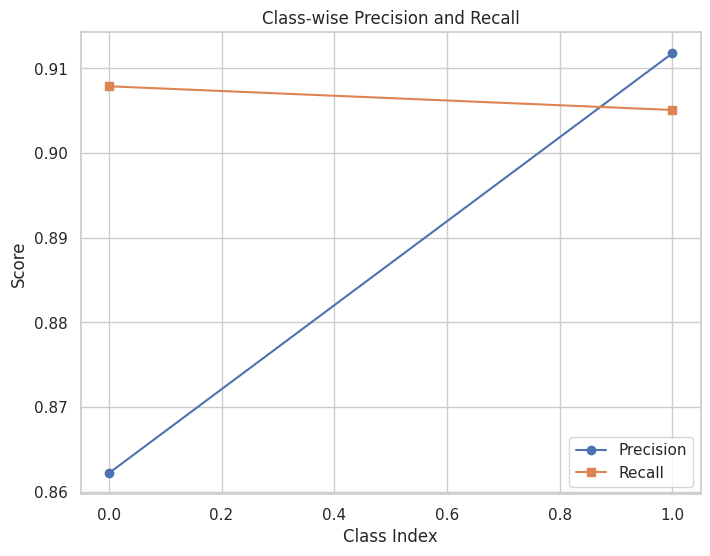

In [ ]:
# Save CSV
df = pd.DataFrame({
    "Class Index": list(range(len(precision))),
    "Precision": precision,
    "Recall": recall
})
df.to_csv(f"{save_dir}/results.csv", index=False)

# Save Accuracy Plot
plt.figure(figsize=(8,6))
plt.plot(precision, label="Precision", marker='o')
plt.plot(recall, label="Recall", marker='s')
plt.title("Class-wise Precision and Recall")
plt.xlabel("Class Index")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.savefig(f"{save_dir}/precision_recall.png")
plt.show()

In [ ]:
import os

image_folder = '/content/drive/MyDrive/Stroke/train/images/'
file_list = os.listdir(image_folder)

print("Total files found:", len(file_list))
print("First few files:", file_list[:10])


Total files found: 1289
First few files: ['100-1-_jpg.rf.aa866c4004e607b4ca85e28f7ffab758.jpg', '100-10-_jpg.rf.4329da4e4c3803f1063f060ff66f3088.jpg', '100-12-_jpg.rf.3009a3dbc0c22380029a2f19e3a862f3.jpg', '100-16-_jpg.rf.238f30aa62d2ad25d7f6691b0fe2ae71.jpg', '100-17-_jpg.rf.b93c3990a9cb3d26aa85a79b9bae95fe.jpg', '100-18-_jpg.rf.7ee07fb8d92916126db7524d0491e112.jpg', '100-2-_jpg.rf.5d54e482a1be791635e05d27544f227f.jpg', '100-22-_jpg.rf.97e286a7ba5c05a421e43a96b790230f.jpg', '100-27-_jpg.rf.166ada26602abcd0951c1528e3812501.jpg', '100-29-_jpg.rf.e29d4e9f125891a7299c431727e6c8e1.jpg']


In [ ]:
import os

# Paths
label_folder = '/content/drive/MyDrive/Stroke/valid/labels/'
num_classes =2  # adjust as needed
label_counts = [0] * num_classes
invalid_labels = {}

# Count labels
for file_name in os.listdir(label_folder):
    if file_name.endswith('.txt'):
        with open(os.path.join(label_folder, file_name), 'r') as f:
            for line_num, line in enumerate(f.readlines(), 1):
                parts = line.strip().split()
                if len(parts) == 0:
                    continue  # skip blank line
                try:
                    cls = int(parts[0])
                    if 0 <= cls < num_classes:
                        label_counts[cls] += 1
                    else:
                        invalid_labels.setdefault(cls, []).append(file_name)
                except ValueError:
                    print(f"⚠️ Warning: Non-integer label at {file_name}, line {line_num}")

# Display results
print("✅ Label Counts Per Class:")
for i, count in enumerate(label_counts):
    print(f"Class {i}: {count} boxes")

if invalid_labels:
    print("\n❌ Invalid label classes found:")


✅ Label Counts Per Class:
Class 0: 152 boxes
Class 1: 217 boxes


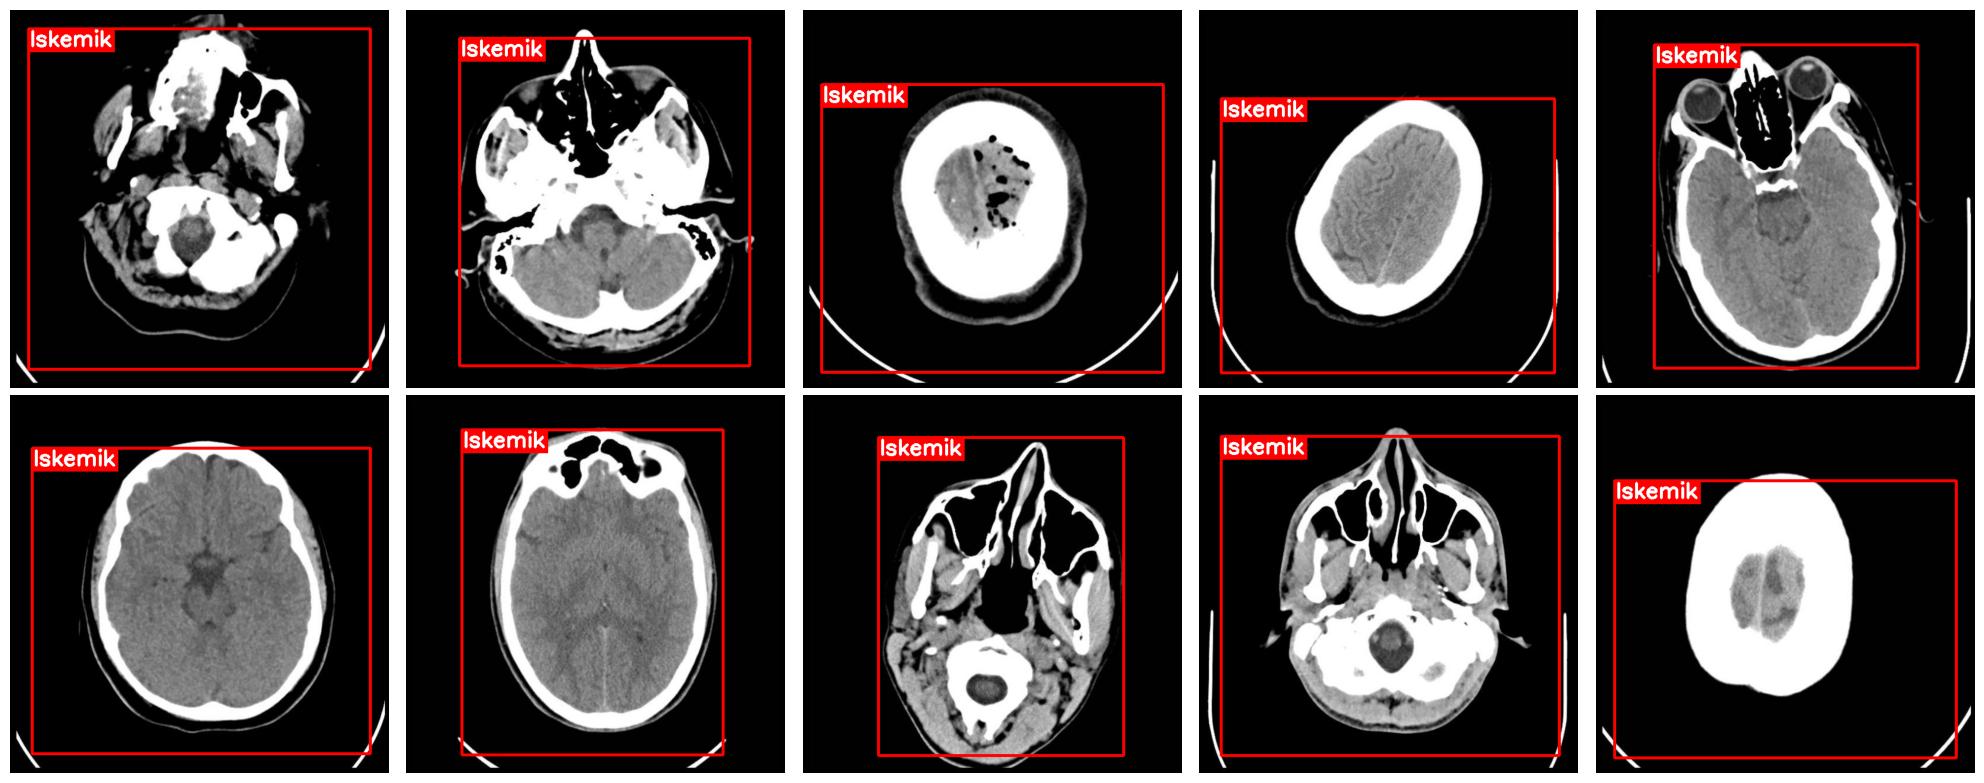

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import glob
import random

# Class names
class_names = ['Hemoragik', 'Iskemik']

# Paths
val_img_dir = '/content/drive/MyDrive/Stroke/valid/images/'
val_label_dir = '/content/drive/MyDrive/Stroke/valid/labels/'

# Collect image paths
val_image_paths = glob.glob(val_img_dir + '*.jpg')
random.shuffle(val_image_paths)
val_image_paths = val_image_paths[:10]

# Plotting
plt.figure(figsize=(20, 8))

for idx, img_path in enumerate(val_image_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    label_path = val_label_dir + os.path.basename(img_path).replace('.jpg', '.txt')

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    cls, cx, cy, bw, bh = map(float, parts[:5])
                    cls = int(cls)

                    # Make box slightly smaller: apply 10% shrink
                    shrink_factor = 0.9
                    bw *= shrink_factor
                    bh *= shrink_factor

                    x1 = int((cx - bw / 2) * w)
                    y1 = int((cy - bh / 2) * h)
                    x2 = int((cx + bw / 2) * w)
                    y2 = int((cy + bh / 2) * h)

                    # Draw a slightly thicker box (3)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

                    # Draw label
                    label = class_names[cls]
                    font_scale = 1.2
                    thickness = 3
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    (text_w, text_h), baseline = cv2.getTextSize(label, font, font_scale, thickness)

                    text_x = x1 + 2
                    text_y = y1 + text_h + 2

                    cv2.rectangle(img, (text_x - 2, text_y - text_h - 4),
                                       (text_x + text_w + 2, text_y + baseline - 2),
                                       (255, 0, 0), -1)
                    cv2.putText(img, label, (text_x, text_y), font, font_scale, (255, 255, 255), thickness)

    # Subplot display
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load your result.csv file from correct path
df = pd.read_csv('StrokeProject/exp1/results.csv')

# Get the last epoch's metrics
last = df.tail(1)

# Show final metrics nicely
print("\n📊 Final Metrics at Last Epoch:")
print(f"✅ Precision: {last['metrics/precision(B)'].values[0]*100:.2f}%")
print(f"✅ Recall: {last['metrics/recall(B)'].values[0]*100:.2f}%")
print(f"✅ mAP@0.5: {last['metrics/mAP50(B)'].values[0]*100:.2f}%")
print(f"✅ mAP@0.5:0.95: {last['metrics/mAP50-95(B)'].values[0]*100:.2f}%")



📊 Final Metrics at Last Epoch:
✅ Precision: 89.21%
✅ Recall: 90.01%
✅ mAP@0.5: 95.33%
✅ mAP@0.5:0.95: 91.12%


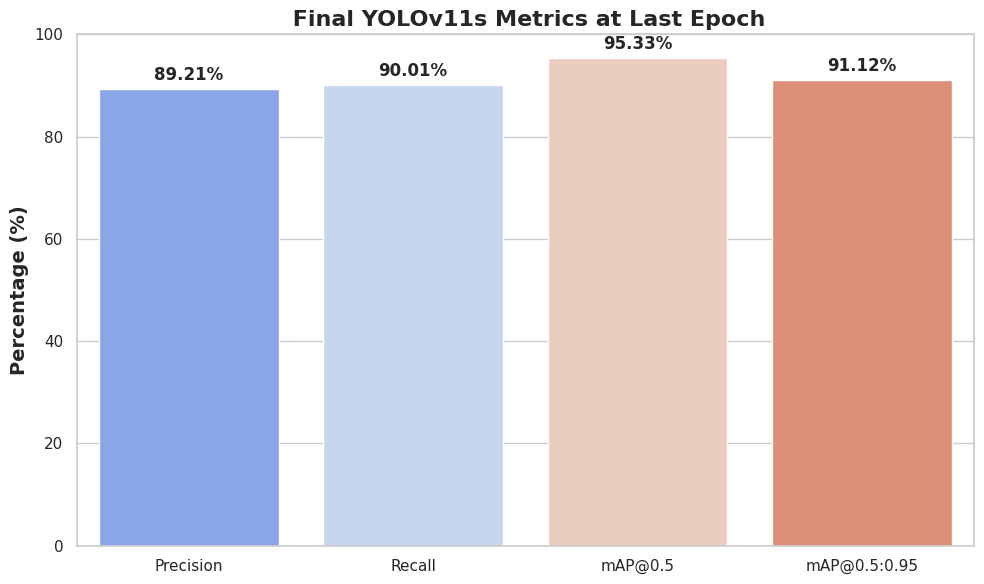

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Data
last = df.tail(1)
metrics = {
    "Precision": last['metrics/precision(B)'].values[0],
    "Recall": last['metrics/recall(B)'].values[0],
    "mAP@0.5": last['metrics/mAP50(B)'].values[0],
    "mAP@0.5:0.95": last['metrics/mAP50-95(B)'].values[0]
}

# Convert to percentage
metrics_percent = {k: round(v*100, 2) for k, v in metrics.items()}

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=list(metrics_percent.keys()), y=list(metrics_percent.values()), palette="coolwarm")

# Annotate values on top of bars
for i, value in enumerate(metrics_percent.values()):
    bars.text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Final touches
plt.title(" Final YOLOv11s Metrics at Last Epoch", fontsize=16, fontweight='bold')
plt.ylabel("Percentage (%)", fontsize=14,fontweight='bold')
plt.ylim(0, 100)
plt.xlabel("")  # remove x-label
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


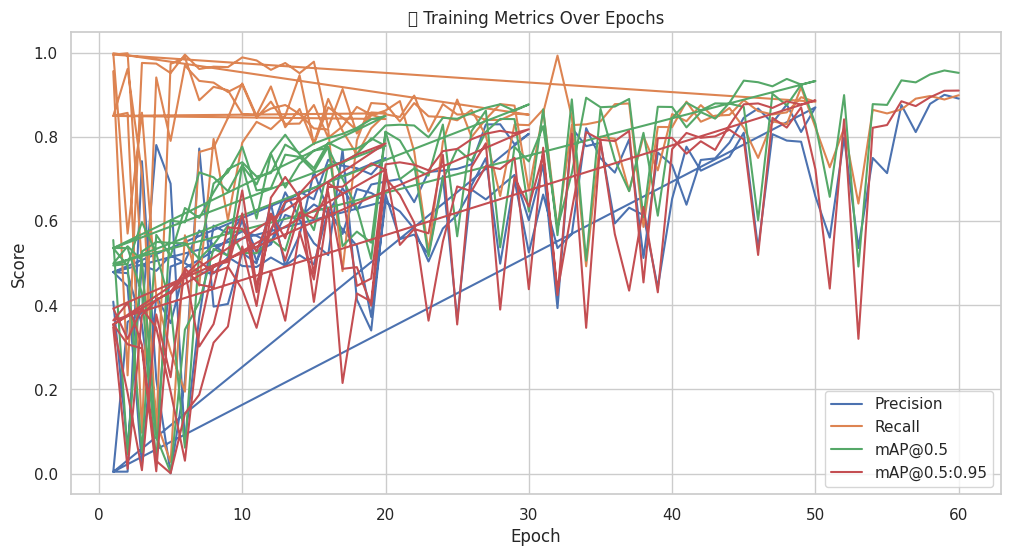

In [ ]:
# Plot training metrics over epochs
plt.figure(figsize=(12,6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('📈 Training Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


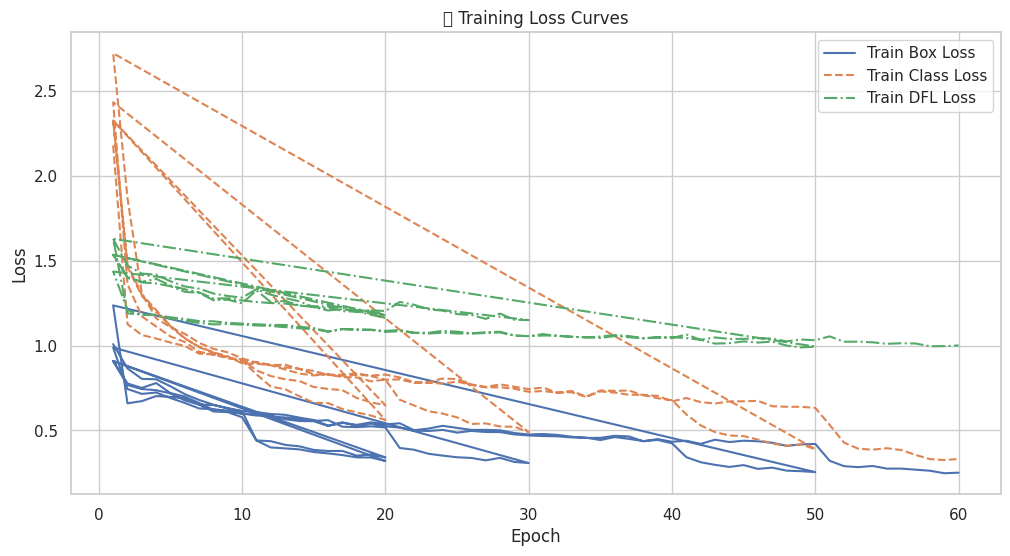

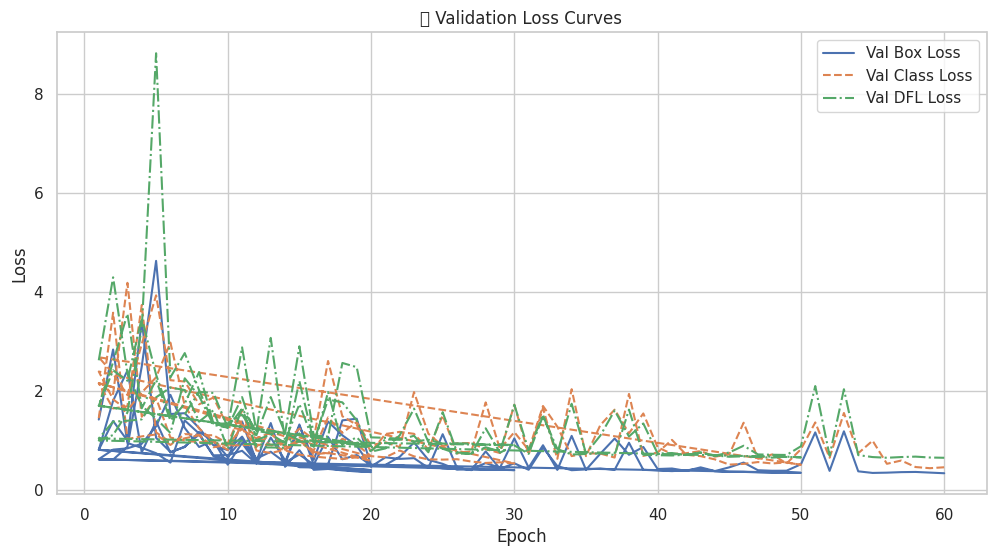

In [ ]:
import matplotlib.pyplot as plt

# Plot training losses
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', linestyle='-')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss', linestyle='--')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss', linestyle='-.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('📉 Training Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation losses
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', linestyle='-')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss', linestyle='--')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', linestyle='-.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('📉 Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()



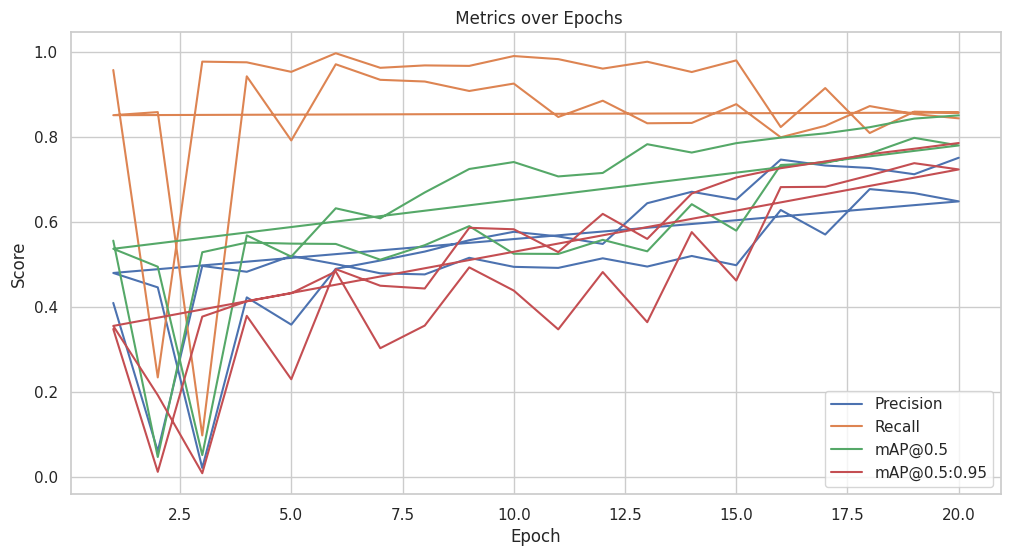

In [ ]:
# Plot Precision, Recall, mAP
plt.figure(figsize=(12,6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title(' Metrics over Epochs')
plt.legend()
plt.grid(True)
plt.show()


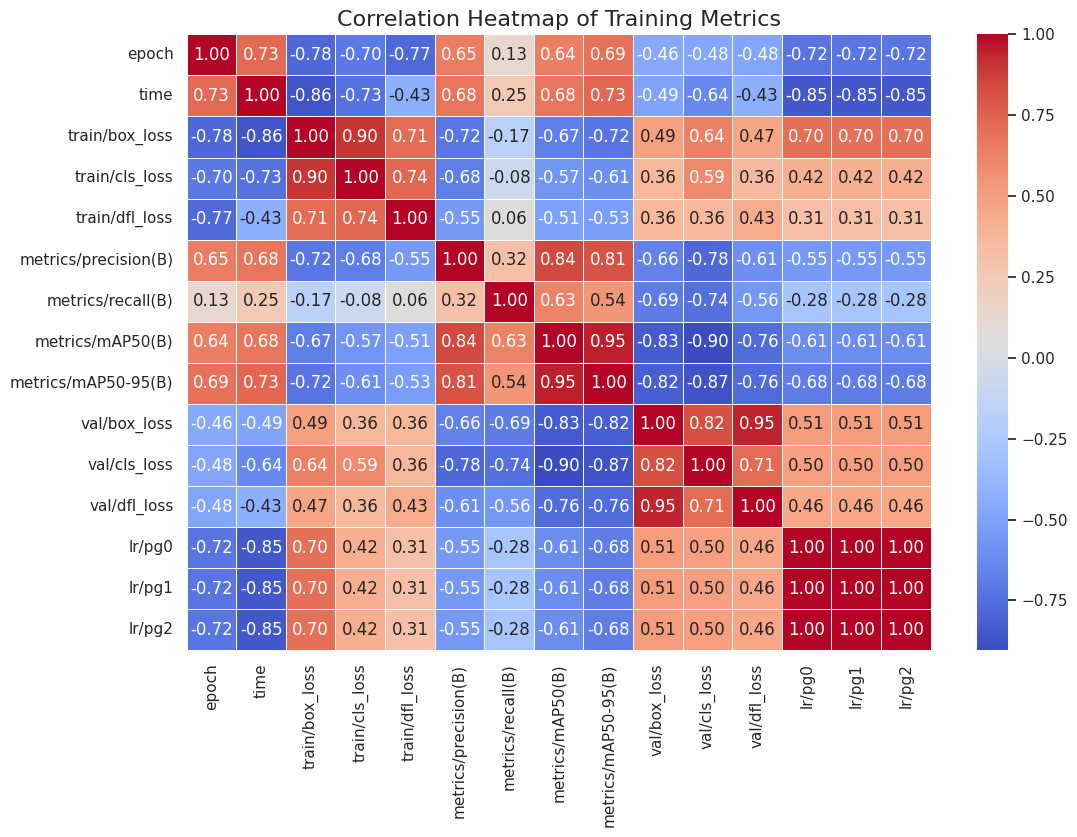

In [ ]:
# Only use numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Training Metrics", fontsize=16)
plt.show()


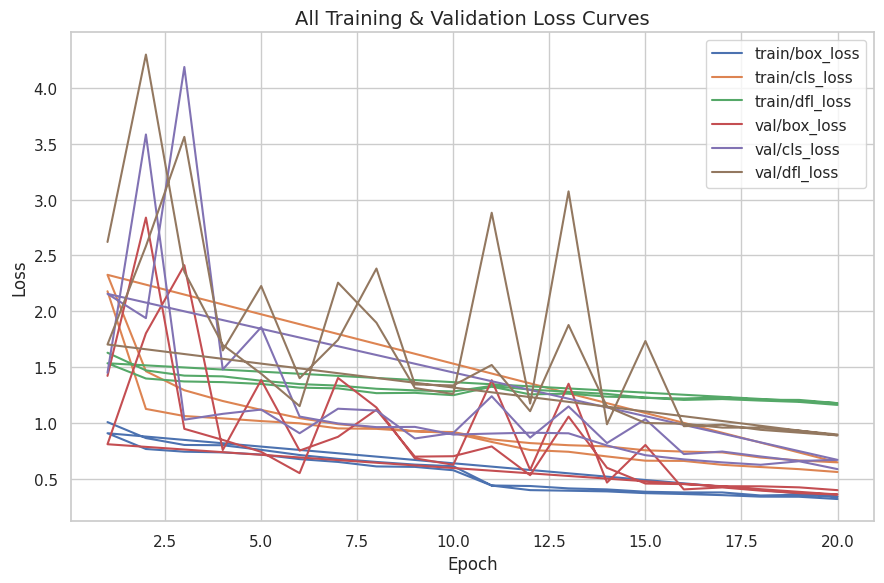

In [ ]:
plt.figure(figsize=(9, 6))
loss_columns = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss']

for col in loss_columns:
    plt.plot(df['epoch'], df[col], label=col)

plt.title("All Training & Validation Loss Curves", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()